## Import libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading two dasets with 227 countries which repeat ciclycally for 5 different attributes:
*We have 5 datasets inside of one 'SUPER'dataset*. *Need to split them up in five separately*
### total
### nuclear
### renewable
### fossil fuel
### hydroelectric pumped storage

In [43]:
capacity = pd.read_csv('../raw_data/electricity_capacity.csv',sep=',',header=4, quotechar='"',decimal=',')
generation = pd.read_csv('../raw_data/electricity_generation.csv',sep=',',header=4, quotechar='"',decimal=',')


## For each dataset we define the names we want to split it up: their name categories

In [44]:
categories_generation = ['Generation', 'Nuclear', 'Renewables', 'Fossil Fuels', 'Hydroelectric Pumped Storage']
categories_capacity = ['Capacity', 'Nuclear', 'Renewables', 'Fossil Fuels', 'Hydroelectric Pumped Storage']

## We save the index where the different datasets have to been splitted up

In [45]:
indexes = []
for i in categories_generation:
    indexes.append(generation[generation['Unnamed: 1'] == i].index[0])

## Slicing every dataset (from a total of 2: generation and capacity of eletrical energy) and save them in two dataframes.

In [46]:
#definition of slicing function

def slicing(df, indexes):
    dataframes = []
    for i in range(len(indexes) - 1):
        dataframes.append(df.iloc[indexes[i]: indexes[i + 1]])
    else:
        dataframes.append(df.iloc[indexes[i + 1]:])
    return dataframes

##saving the datases in a list of dataframes

generation = slicing(generation,indexes)
capacity = slicing (capacity,indexes)

### Rename all dataset (5 datasets from the 2 initial 'SUPER'dataset), makes a total of 10

In [47]:
gen_total= generation[0].reset_index(drop=True)
gen_nuclear = generation[1].reset_index(drop=True)
gen_renewable = generation[2].reset_index(drop=True) 
gen_fossil = generation[3].reset_index(drop=True) 
gen_hidro = generation[4].reset_index(drop=True) 

cap_total = capacity[0].reset_index(drop=True)
cap_nuclear = capacity[1].reset_index(drop=True)
cap_renewable = capacity[2].reset_index(drop=True)
cap_fossil = capacity[3].reset_index(drop=True)
cap_hidro = capacity[4].reset_index(drop=True)




### Read the other 4 'simple' dataset

In [48]:
consumption = pd.read_csv('../raw_data/electricity_consumption.csv',sep=',',header=4, quotechar='"',decimal=',')
exports = pd.read_csv('../raw_data/electricity_exports.csv',sep=',',header=4, quotechar='"',decimal=',')
imports = pd.read_csv('../raw_data/electricity_imports.csv',sep=',',header=4, quotechar='"',decimal=',')
population = pd.read_csv('../raw_data/population.csv',sep=',',header=4, quotechar='"',decimal=',')


## Gathering all useful datasets as function of how many initial rows we need to drop, because there is just the category of attribute. 

## That information it in the name of the proper dataframe

In [49]:
features_01 = list([consumption, exports, imports, population, gen_total,cap_total,gen_renewable,cap_renewable])
features_1 = list([gen_nuclear, gen_fossil, gen_hidro, cap_nuclear,cap_fossil,cap_hidro])


# DATA CLEANING SECTION

## Define a function to clean all datasets on an authomatized way.

## CLEAN01 FUNCTION: *dataset with two first rows to drop*

### #1 dropping the empty  and the units columns

### #2 dropping the first 2 rows because there are the quantity to analyze and the category

### #3 rename the country column

### #4 Set'country' index

### #5 Drop the missing values

### #6 Replacing '--', '-' for nan. I discover for trial and error.

### #7 Convert the data from objetct to number (float or int)

### #8  Transpose the matrix to have the country as index and year as columns.


In [50]:
def clean01():
    for df in features_01:
        
        #1
        df.drop('Unnamed: 0',axis=1,inplace=True)
        
        df.drop('Unnamed: 2',axis=1,inplace=True)
        
        #2
        df.drop([0,1],axis=0,inplace=True)
        
        #3
        df.rename(columns={'Unnamed: 1':'country'},inplace=True)
        
        #4        
        df.set_index('country', inplace=True)

        #5
        df.dropna(inplace=True)
        
        #6
        df.replace('--', np.nan, inplace=True)
        df.replace('-', np.nan, inplace=True)
        
        #7
        for year in df.columns:
            df[year] = pd.to_numeric(df[year],errors='coerce')
        
        #8
        df=df.T
clean01()

## Define a function to clean all datasets on an authomatized way.

## CLEAN01 FUNCTION: *dataset with just first row to drop*

### #1 dropping the empty  and the units columns

### #2 dropping the first 2 rows because there are the quantity to analyze and the category

### #3 rename the country column

### #4 Set'country' index

### #5 Drop the missing values

### #6 Replacing '--', '-' for nan. I discover for trial and error.

### #7 Convert the data from objetct to number (float or int)

### #8  Transpose the matrix to have the country as index and year as columns.


In [51]:
def clean2():
    for df in features_1:
        
        #1
        df.drop('Unnamed: 0',axis=1,inplace=True)
        
        df.drop('Unnamed: 2',axis=1,inplace=True)
        
        #2
        df.drop([0],axis=0,inplace=True)
        
        #3
        df.rename(columns={'Unnamed: 1':'country'},inplace=True)
        df.reset_index(drop=True,inplace=True)
        
        #4
        #for el in range(0,1146,)
        
        #4        
        #df.set_index('country', inplace=True)

        #5
        #df.dropna(inplace=True)
        
        #6
        #df.replace('--', np.nan, inplace=True)
        #df.replace('-', np.nan, inplace=True)
        
        #7
        #for year in df.columns:
         #   df[year] = pd.to_numeric(df[year],errors='coerce')
        
        #8
        #df=df.T
clean2()

In [ ]:
spain = consumption['Spain':'Spain']

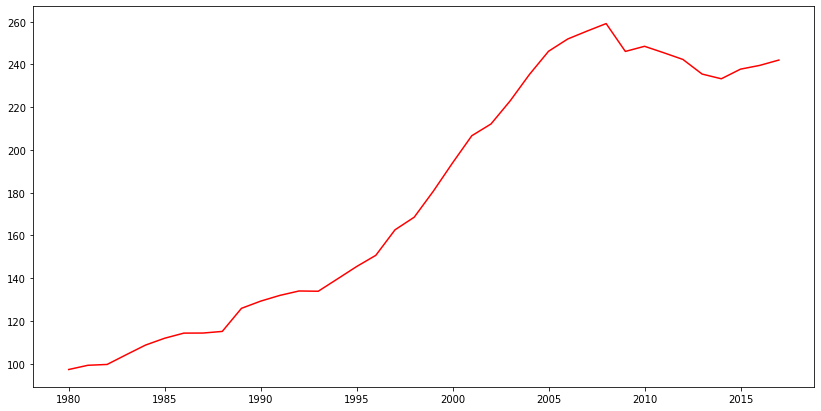

In [88]:
t = np.arange(1980,2018,1)
fig,ax = plt.subplots(1,1, figsize=(14,7))
plt.plot(t, spain.T, 'r') 
#plt.plot(t, consumption['United States'], 'b') 
plt.show()
